In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [17]:
data = pd.read_csv(r"C:\Users\user\Downloads\car_age_price.csv")
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [7]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [18]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [19]:
x = data[['Year']]
y = data['Price']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

# Linear Regression

In [21]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [22]:
# predictions
predictions_linear = linear_model.predict(x_test)
pred_price_2022_linear = linear_model.predict(pd.DataFrame([[2022]], columns = x_train.columns))

In [24]:
# Evaluation
print("Linear Regression:")
print('Mean Squared Error =',mean_squared_error(y_test,predictions_linear))
print("Mean Absolute Error =", mean_absolute_error(y_test, predictions_linear))
print('R squared Value =',r2_score(y_test,predictions_linear))
print(f"Predicted Price for 2022: {pred_price_2022_linear[0]:.2f}")

Linear Regression:
Mean Squared Error = 4326906256.829671
Mean Absolute Error = 53534.77957001264
R squared Value = 0.36759313425902185
Predicted Price for 2022: 743601.62


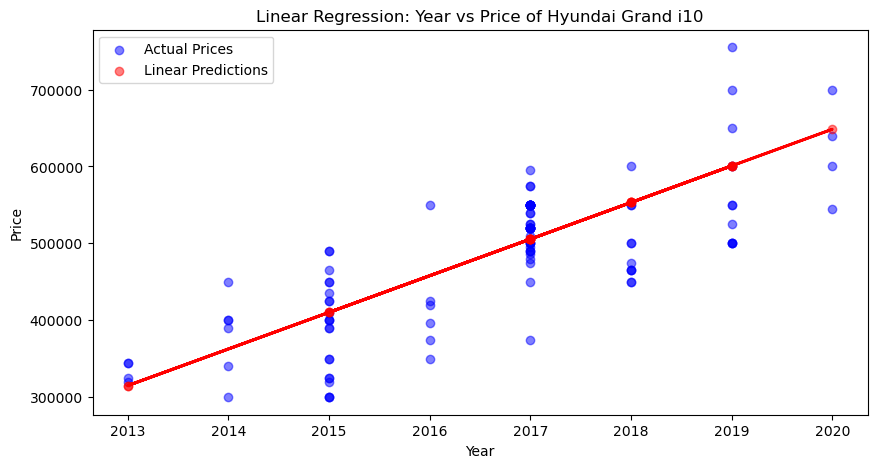

In [25]:
# Visualization for Linear Regression
plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='blue', label='Actual Prices', alpha=0.5)
plt.scatter(x_test, predictions_linear, color='red', label='Linear Predictions', alpha=0.5)
plt.plot(x_test, predictions_linear, color='red', linewidth=2)  # Line for linear regression
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Linear Regression: Year vs Price of Hyundai Grand i10')
plt.legend()
plt.show()

#  Lasso Regression

In [26]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1) 
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.1)

In [29]:
# Predictions
predictions_lasso = lasso_model.predict(x_test)
pred_price_2022_lasso = lasso_model.predict(pd.DataFrame([[2022]], columns = x_train.columns))

In [30]:
# Evaluation
print("Lasso Regression:")
print("Mean Square Error:", mean_squared_error(y_test,predictions_lasso))
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions_lasso))
print("R^2:", r2_score(y_test, predictions_lasso))
print("Predicted Price for 2022:", pred_price_2022_lasso)

Lasso Regression:
Mean Square Error: 4326901608.19506
Mean Absolute Error: 53534.73464390959
R^2: 0.36759381368868127
Predicted Price for 2022: [743601.39177768]


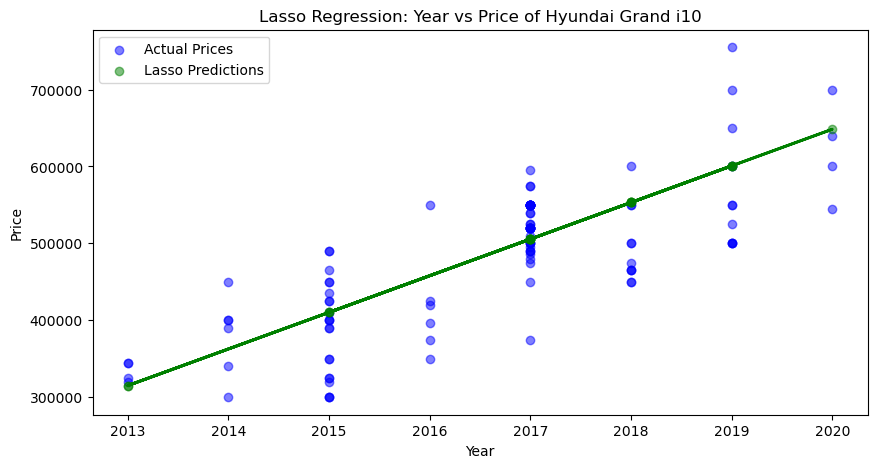

In [31]:
# Visualization for Lasso Regression
plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='blue', label='Actual Prices', alpha=0.5)
plt.scatter(x_test, predictions_lasso, color='green', label='Lasso Predictions', alpha=0.5)
plt.plot(x_test, predictions_lasso, color='green', linewidth=2)  # Line for lasso regression
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Lasso Regression: Year vs Price of Hyundai Grand i10')
plt.legend()
plt.show()